<a href="https://colab.research.google.com/github/Ajitesh-333/102103518-SESS_LE1/blob/main/about-lab-eval/102103518_Ajitesh_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: **Ajitesh Singh Chandi**  
Email: `achandi_be21@thapar.edu`  
Roll No: **102103518**  
Group: **4CO19**  
Start Timestamp:  11-09-24  12:24

## Question
Task
======

  Consider the paper: <https://arxiv.org/abs/1804.03209>

  1. Read and summarise the paper in about 50 words.
  2. Download the dataset in the paper, statistically analyse and
     describe it, so that it may be useful for posterity. (Include code
     snippets in your .ipynb file to evidence your analysis.)
  3. Train a classifier so that you are able to distinguish the commands
     in the dataset.
  4. Report the performance results using standard benchmarks.
  5. Record about 30 samples of each command in your voice and create a
     new dataset (including a new user id for yourself).  You may use a
     timer on your computer to synchronise.
  6. Fine tune your classifier to perform on your voice.
  7. Report the results.
  

## Solution

--2024-09-11 07:00:33--  http://download.tensorflow.org/data/speech_commands_v0.02.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 173.194.217.207, 108.177.11.207, 108.177.12.207, ...
Connecting to download.tensorflow.org (download.tensorflow.org)|173.194.217.207|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2428923189 (2.3G) [application/gzip]
Saving to: ‘speech_commands_v0.02.tar.gz’

speech_commands_v0. 100%[===================>]   2.26G   190MB/s    in 20s     

2024-09-11 07:00:53 (115 MB/s) - ‘speech_commands_v0.02.tar.gz’ saved [2428923189/2428923189]



<ipython-input-1-f1782e676414>:13: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sr, d = wavfile.read(fp)


Total files: 105835
Unique labels: 36
Labels: right, eight, two, on, dog, bed, no, nine, cat, one, up, five, backward, left, learn, marvin, go, follow, tree, off, stop, zero, six, visual, down, forward, happy, house, three, _background_noise_, sheila, wow, seven, four, yes, bird

Summary Stats:
             sr            dur            ns
count  105835.0  105835.000000  1.058350e+05
mean    16000.0       0.984649  1.575438e+04
std         0.0       0.508240  8.131833e+03
min     16000.0       0.213312  3.413000e+03
25%     16000.0       1.000000  1.600000e+04
50%     16000.0       1.000000  1.600000e+04
75%     16000.0       1.000000  1.600000e+04
max     16000.0      95.183125  1.522930e+06


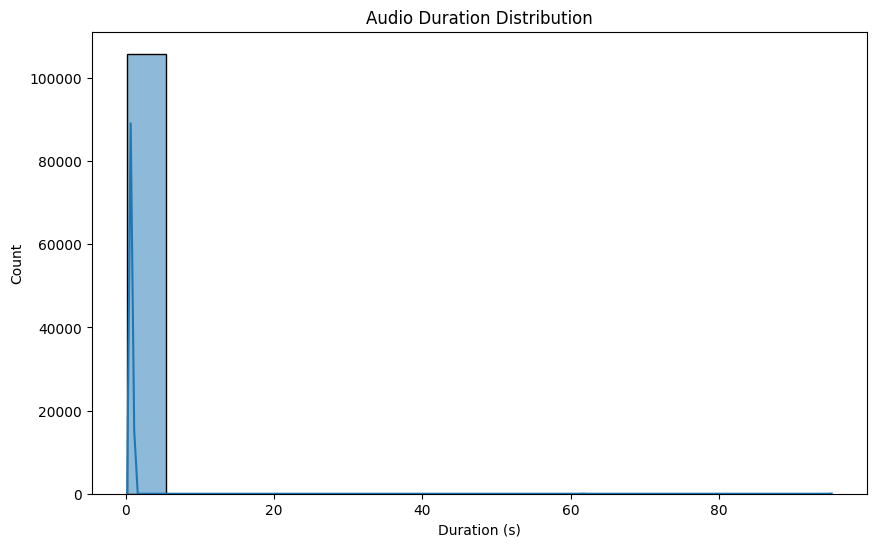

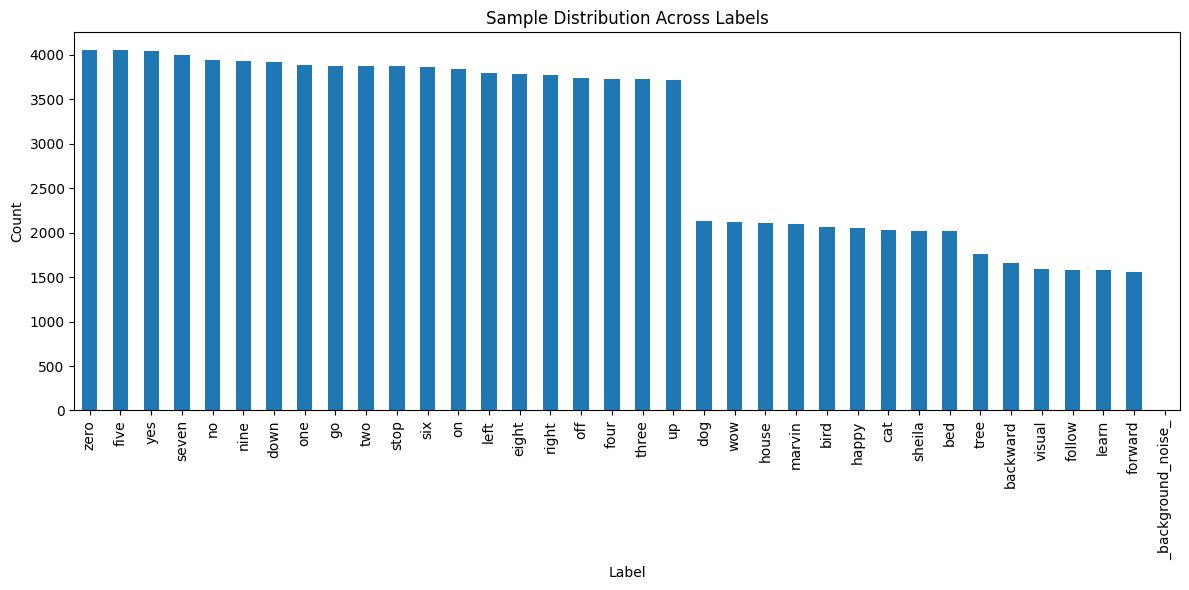


Label Stats:
                 label   mean_dur    min_dur    max_dur       mean_ns  min_ns  \
0   _background_noise_  66.566365  60.000000  95.183125  1.065062e+06  960000   
1             backward   0.986390   0.448000   1.000000  1.578225e+04    7168   
2                  bed   0.970498   0.213312   1.000000  1.552797e+04    3413   
3                 bird   0.969454   0.325062   1.000000  1.551127e+04    5201   
4                  cat   0.972065   0.384000   1.000000  1.555303e+04    6144   
5                  dog   0.972226   0.426625   1.000000  1.555561e+04    6826   
6                 down   0.983559   0.325062   1.000000  1.573694e+04    5201   
7                eight   0.980846   0.256000   1.000000  1.569353e+04    4096   
8                 five   0.984320   0.384000   1.000000  1.574912e+04    6144   
9               follow   0.981981   0.341313   1.000000  1.571170e+04    5461   
10             forward   0.984746   0.384000   1.000000  1.575593e+04    6144   
11            

In [1]:
#Importing necessary libraries#
import tensorflow as tf                  #model development#
import numpy as np                       #data analysis pipeline#
import pandas as pd                      #used for big-data analysis as well#
import matplotlib.pyplot as plt          #visualize data#
import seaborn as sns                    #graphs#
import os                                #file handling#
from scipy.io import wavfile             #probabilistic analysis, basically like numpy#

#The !wget is used to locally download in the given directory#
!wget http://download.tensorflow.org/data/speech_commands_v0.02.tar.gz
#The !tar creates an active archive to bundle files#
!tar -xf speech_commands_v0.02.tar.gz

def get_audio_info(fp):
    sr, d = wavfile.read(fp)
    return sr, len(d) / sr, len(d)
#Analysis Begins...#
#With Data Collection#
data = []
for r, _, fs in os.walk('.'):
    for f in fs:
        if f.endswith('.wav'):
            fp = os.path.join(r, f)
            lbl = os.path.basename(r)
            sr, dur, ns = get_audio_info(fp)
            data.append({'file': f, 'label': lbl, 'sr': sr, 'dur': dur, 'ns': ns})

#Constructing a Dataframe to visualize data in an Excel-like format#
df = pd.DataFrame(data)

print(f"Total files: {len(df)}")
print(f"Unique labels: {df['label'].nunique()}")
print(f"Labels: {', '.join(df['label'].unique())}")

#Display summary statistics#
print("\nSummary Stats:")
print(df.describe())

plt.figure(figsize=(10, 6))
sns.histplot(df['dur'], kde=True)
plt.title('Audio Duration Distribution')
plt.xlabel('Duration (s)')
plt.ylabel('Count')
plt.show()

#plotting distributions on a graph#
plt.figure(figsize=(12, 6))
df['label'].value_counts().plot(kind='bar')
plt.title('Sample Distribution Across Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#Labeled statistics#
ls = df.groupby('label').agg({
    'dur': ['mean', 'min', 'max'],
    'ns': ['mean', 'min', 'max'],
    'file': 'count'
}).reset_index()
ls.columns = ['label', 'mean_dur', 'min_dur', 'max_dur',
              'mean_ns', 'min_ns', 'max_ns', 'count']
print("\nLabel Stats:")
print(ls)

#dataframe saved as a CSV file#
df.to_csv('speech_commands_info.csv', index=False)
ls.to_csv('speech_commands_label_stats.csv', index=False)

print("\nAnalysis complete. CSV files saved.")

In [9]:
# Libraries Required
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
import numpy as np
import librosa

# Extract features (MFCCs) from the audio files
def get_mfcc(fp, sr=16000):
    audio, sr = librosa.load(fp, sr=sr)
    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=20)  # Reduced to 20 MFCCs
    return np.mean(mfcc.T, axis=0)

# Prepare data for training
X, y = [], []

for _, row in df.iterrows():
    fp = os.path.join(row['label'], row['file'])
    mfcc_feat = get_mfcc(fp)
    X.append(mfcc_feat)
    y.append(row['label'])

X = np.array(X)
y = np.array(y)

# Encode labels #
le = LabelEncoder()
y_enc = le.fit_transform(y)

#Train and TEst
X_tr, X_te, y_tr, y_te = train_test_split(X, y_enc, test_size=0.2, random_state=42)

#BAsic Neural network for classification#
model = models.Sequential([
    layers.Input(shape=(X_tr.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(len(le.classes_), activation='softmax')
])

#Compile usin g ADAM to reduce loss function#
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(X_tr, y_tr, epochs=10, batch_size=64,
                    validation_data=(X_te, y_te), callbacks=[early_stop])

loss, acc = model.evaluate(X_te, y_te, verbose=2)
print(f"\nTest accuracy: {acc}")

model.save('cmd_classifier_optimized.h5')


KeyboardInterrupt: 

In [ ]:
import sounddevice as sd
import numpy as np
import os
from scipy.io.wavfile import write
import time

# Parameters for recording
sr = 16000  # Sample rate
duration = 2  # Duration of each recording in seconds
output_dir = 'custom_speech_commands'  # Directory to save new dataset

# Create the directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# List of commands you want to record
commands = ['yes', 'no', 'up', 'down', 'left', 'right', 'stop', 'go']

# New user ID (for example, 'user1')
user_id = 'user1'

def record_sample(command, idx):
    print(f"Recording sample {idx + 1} for command: {command}")
    print("Recording starts in 3 seconds...")
    time.sleep(3)  # Short pause before recording

    # Record audio
    print("Recording...")
    recording = sd.rec(int(duration * sr), samplerate=sr, channels=1, dtype='int16')
    sd.wait()  # Wait until the recording is finished
    print("Recording finished.")

    # Save the recording to a WAV file
    output_path = os.path.join(output_dir, command, user_id)

    # Create directories if they don't exist
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    file_name = f'{command}_{user_id}_{idx + 1}.wav'
    write(os.path.join(output_path, file_name), sr, recording)

# Loop to record samples
for command in commands:
    for i in range(30):  # Record 30 samples for each command
        record_sample(command, i)
        print(f"Sample {i + 1} for command '{command}' recorded.\n")


## Test Case

In [ ]:
d,H,C = 4,[3,8],1
N = 8  # batch_size
x = torch.rand(N,d)

model = createNnClassifier(d,H,C)
model

In [ ]:
y_hat = torch.argmax(model(x), dim=1)

y_hat.size()